# Pyber

Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between four key variables:

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In addition, you will be expected to produce the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

In [1]:
#IMPORT DEPENDENCIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Data management

In [2]:
#Read in files and preview
city = pd.read_csv("raw_data/city_data.csv", index_col = 'city')
rides = pd.read_csv("raw_data/ride_data.csv")

#Preview Data
print(city.head())
print(rides.head())


                driver_count   type
city                               
Kelseyland                63  Urban
Nguyenbury                 8  Urban
East Douglas              12  Urban
West Dawnfurt             34  Urban
Rodriguezburgh            52  Urban
          city                 date   fare        ride_id
0     Sarabury  2016-01-16 13:49:27  38.35  5403689035038
1    South Roy  2016-01-02 18:42:34  17.49  4036272335942
2  Wiseborough  2016-01-21 17:35:29  44.18  3645042422587
3  Spencertown  2016-07-31 14:53:22   6.87  2242596575892
4   Nguyenbury  2016-07-09 04:42:44   6.28  1543057793673


In [3]:
#Summarize average fare and number of rides per city
bycity_group = rides.groupby('city')
bycity = pd.DataFrame(bycity_group["fare"].mean())
bycity.rename(columns = {"fare": "Average Fare ($)"}, inplace = True)
bycity['Total rides'] = bycity_group["ride_id"].count()
bycity.describe()
bycity.head()



,Average Fare ($),Total rides
city,,
Alvarezhaven,23.928710,31
Alyssaberg,20.609615,26
Anitamouth,37.315556,9
Antoniomouth,23.625000,22
Aprilchester,21.981579,19


In [5]:
#Merge summary data to city data
#used join instead merge because in the indexes were the same
city = city.join(bycity,how = "inner")  
city["Drivers per ride"] = city['driver_count'] / city['Total rides']
print(city.describe())
city.head()

       driver_count  Average Fare ($)  Total rides  Drivers per ride
count    126.000000        126.000000   126.000000        126.000000
mean      26.579365         28.095444    19.103175          1.392703
std       21.438415          5.095073     7.854506          0.986026
min        1.000000         19.523000     1.000000          0.041667
25%        9.000000         24.178932    13.000000          0.602778
50%       20.000000         27.030370    20.000000          1.236364
75%       43.000000         31.708960    25.000000          1.920567
max       73.000000         49.620000    34.000000          7.000000


,driver_count,type,Average Fare ($),Total rides,Drivers per ride
city,,,,,
Alvarezhaven,21,Urban,23.928710,31,0.677419
Alyssaberg,67,Urban,20.609615,26,2.576923
Anitamouth,16,Suburban,37.315556,9,1.777778
Antoniomouth,21,Urban,23.625000,22,0.954545
Aprilchester,49,Urban,21.981579,19,2.578947


## Bubble Plot - Average Fare versus rides - bubble size based on # of drivers
`

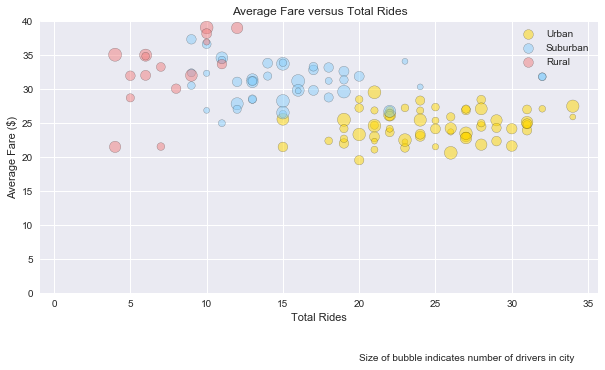

In [6]:
#Bubble Plot - Average Fare versus rides - bubble size base on # of drivers

#Define figure options
size = round(city['driver_count']**0.5*20, 0) 
plt.figure(figsize = (10,5))

#Urban
plt.scatter(city['Total rides'].loc[city["type"] == "Urban"], 
            city['Average Fare ($)'].loc[city["type"] == "Urban"] , 
            s = size, alpha = 0.5, color = 'gold', edgecolors='black',
            label = "Urban")

#Suburban
plt.scatter(city['Total rides'].loc[city["type"] == "Suburban"], 
            city['Average Fare ($)'].loc[city["type"] == "Suburban"] ,
            s = size, alpha = 0.5, color = 'lightskyblue', edgecolors='black',
            label = "Suburban")

#Rural
plt.scatter(city['Total rides'].loc[city["type"] == "Rural"],
            city['Average Fare ($)'].loc[city["type"] == "Rural"] , 
            s = size, alpha = 0.5, color ='lightcoral', edgecolors='black',
           label = "Rural")

plt.ylabel('Average Fare ($)')
plt.xlabel('Total Rides')
plt.title("Average Fare versus Total Rides")
plt.legend()
plt.ylim(0,40)
note = ("Size of bubble indicates "
        "number of drivers in city")
plt.text(20, -10 ,note, wrap = True )
plt.show()

## Pie Chart - % of Total Fares by City Type

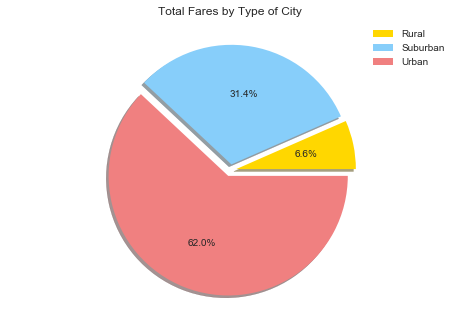

In [16]:
city['Total Fares'] = city['Average Fare ($)'] * city['Total rides']
bytype = city.groupby(by=["type"])
citytypes = ["Rural", "Suburban", "Urban"]
colors = ['gold', 'lightskyblue','lightcoral']

#labels =bytype['type']
explode = [0.05, 0.05, 0.05]
plt.axis("equal") 
plt.pie(bytype['Total Fares'].sum(), explode = explode, 
        shadow = True, autopct = '{:.1f}%'.format, colors = colors)
plt.legend(citytypes)
plt.title("Total Fares by Type of City")
plt.show()


## Pie Chart - % of Total Rides by City Type`

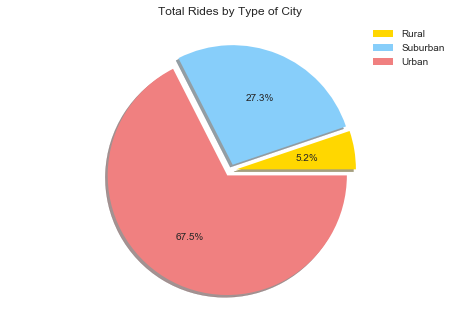

In [18]:

#labels =bytype['type']
explode = [0.05, 0.05, 0.05]
plt.axis("equal") 
plt.pie(bytype['Total rides'].sum(), explode = explode, 
        shadow = True, autopct = '{:.1f}%'.format, colors = colors)
plt.legend(citytypes)
plt.title("Total Rides by Type of City")
plt.show()


## Pie Chart - % of Total Drivers by City Type

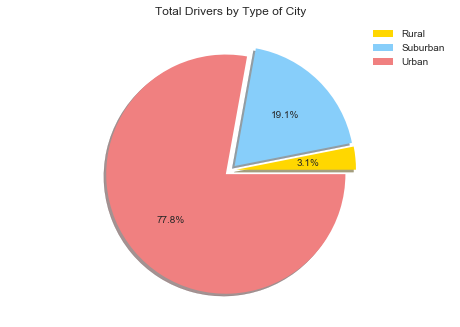

In [19]:

#labels =bytype['type']
explode = [0.05, 0.05, 0.05]
plt.axis("equal") 
plt.pie(bytype['driver_count'].sum(), explode = explode, 
        shadow = True, autopct = '{:.1f}%'.format, colors = colors)
plt.legend(citytypes)
plt.title("Total Drivers by Type of City")
plt.show()

## Conclusions
The taxi driver data shows 3 main patterns:

* Urban areas tend to have more drivers than suburban and rural areas

* Not surprisingly, when more drivers are available the average fare tends to be lower (but this could be correlated to shorted driving distances in urban areas)

* As a share of the total, city drivers (77.8%) outnumber suburban and rural drivers. However, they account for a smaller share of the total revenue (62%) 